# Census Income Data Set

# Income Classification Model
## Introduction
The income dataset was extracted from 1994 U.S. Census database.

## The importance of census statistics
The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

This information makes it possible to plan better services, improve the quality of life and solve existing problems. Statistical information, which serves as the basis for constructing planning forecasts, is essential for the democratic process since it enables the citizens to examine the decisions made by the government and local authorities, and decide whether they serve the public they are meant to help.

## Objective of the project
The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. To achieve this, several classification techniques are explored and the random forest model yields to the best prediction result.

## Features Description
1. Categorical Attributes

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
Individual's highest education degree

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
Individual marital status

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
Individual's occupation

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
Individual's relation in a family

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
Race of Individual

sex: Female, Male.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country

2. Continuous Attributes

age: continuous.
Age of an individual

fnlwgt: final weight, continuous.
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.
Individual's working hour per week

# 2. Fetching Data:

## 2.1 Import packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## 2.2 Import data

In [3]:
data = pd.read_csv("census-income .csv",na_values='?',skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### EDA

In [4]:
data.shape

(32561, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [10]:
data['annual_income'].value_counts()

<=50K    22654
>50K      7508
Name: annual_income, dtype: int64

In [11]:
data['annual_income']=data['annual_income'].map({'<=50K': 0, '>50K': 1})
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


# 4. Summary

## 4.1 Summary statistics for numeric attribute

In [14]:
data_num = data.drop(["education-num","annual_income"], axis=1)
data_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [16]:
data_num.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Summary of attributes explain following things:
>  **For Age :**
1.  The mean value is 38 i.e. on an average the value of age attribute is 38.
2.  Age is having the standerd deviation 13.71 which indicates the deviation of an observation from the mean.    
3.  The value of Age attribute varies from 17 to 90.
4.  The 1st quartile is 28 i.e. 25% of the observations lies below 28.
5.  3rd quartile is 48 which indicates that in 75% of the observations the value of age is less than 48.
6.  The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the value 48.
7.  The difference between mean & median is not significantly high but the difference between 3rd quartile & maximum made the distribution right skewed.


>  **For fnlwgt :**
1.  This is the sampling weight corresponding to the observations.
2.  finalweight seems to be rightly skewed since there is very large distance between median & maximum value as compared to minimum & median value.


> **For capital-gain :**
1.  For capital-gain, the mean is 1079.06 and median is 0, which indicates that the distribution is highly right skewed.
2.  From the qurtiles it is clearly visible that 75% observations are having capital gain zero.
3.  capital-gain is concentrated on the one particular value i.e. zero and other are spread after 3rd quartile which results as the large standard deviation(7452.01).
4.  capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).
 

> **For capital-loss :**
1.  This attribute is similar to the capital-gain i.e. most of the values are centered on 0(this can be told using the summary statistic as minimum is 0 and values lie under 75 percentile is also zero.
2.  Mean is 87 but median is 0(i.e. mean is greater than median this tells us that it is right skewed distribution).


> **For hours-per-week :**
1.  This attribute means number of working hours spend by an individual in a week.
2.  In this data the hours per week atrribute varies within the range of 1 to 99.
3.  75 percentage of the people spend 45 or less working hours per week.
4.  The IQR is very less i.e. [40-45] which indicates that 50% of the observations are concentrated between 40 & 45.
5.  Observations are very sparse below 25th percentile and after 75th percentile.
6.  Using quartiles we can say that data is approximately symmetric.
4.  Minimum is 1 hour per week & maximum value is 99 hours per week means person spending 99 working hours per week are very rare events. We will later analyze that which workclass they belong.

## 4.2 Summary and count for categorical attribute

In [17]:
data.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22286,9840,14065,4038,12463,25933,20380,27504


* Native-country has maximum number of unique categories i.e. 41 categories.
* But the native-country is highly biased toward the US which has frequency of 44689 out of total 48842(nearly 91%).
* Occupation has  more or less uniform distribution of categories as comparerd to the other attributes.
* Race is also biased to the white race category(41762) with 85.5%.
* The top category in workclass is Private having frequency(36705) and percentage(75.5%).

# 5. EDA

## 5.1.Univariate analysis

## 5.1.1 Age

### **i.	Distribution**

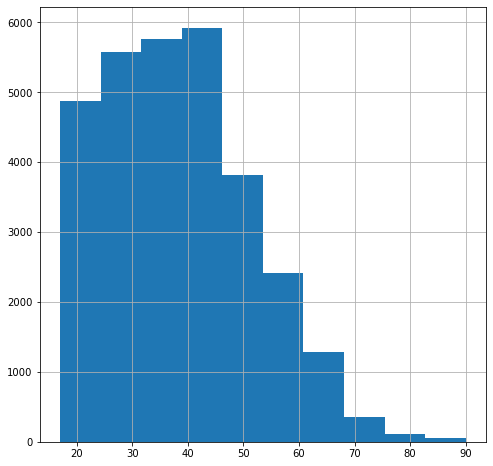

In [18]:
data['age'].hist(figsize=(8,8))
plt.show()

In [19]:
data[data["age"]>70].shape

(384, 15)

### **ii.	Description about the distribution**

The above histogram shows that :
* "age" attribute is not symmetric.
*  it is right-skewed(But this is totally fine as younger adult earn wages not the older ones)
*  Minimum and Maximum age of the people is 17 and 90 respectively.
*  This dataset has fewer observations(868) of people's age after certain age i.e. 70 years.

## 5.1.2 Hours per week

### **i.	Distribution**

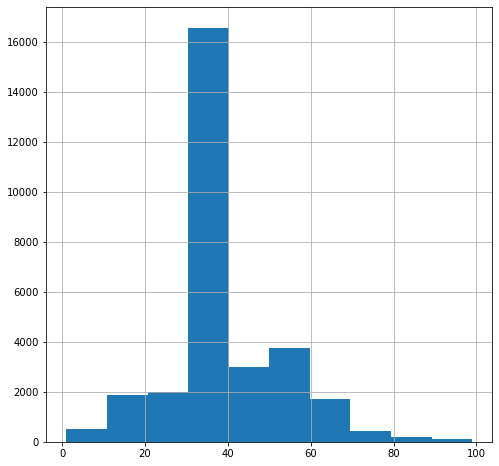

In [20]:
data['hours-per-week'].hist(figsize=(8,8))
plt.show()

### **ii.	Description about the distribution**

This histogram of "hours-per-week" shows that:
* In this data the hours per week atrribute varies within the range of 1 to 99.
* Most people work 30-40 hours per week, they are roughly 27,000 people.
* There are also few people who works 80-100 hours per week and some less than 20 which is unusual. 
*  75 percentage of the people spend 45 or less working hours per week.

## 5.1.3 fnlwgt

**fnlwght** variable may stand for a weight of an observation.

### **i.	Distribution**

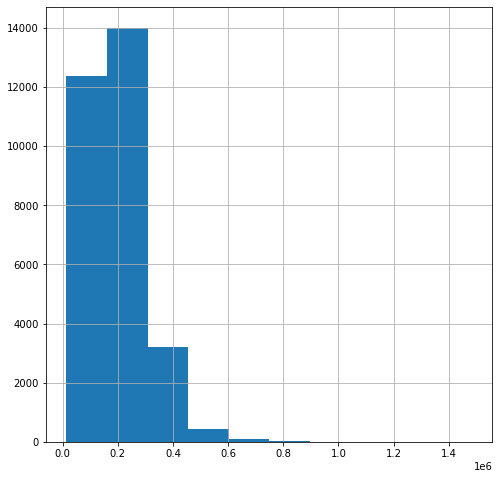

In [21]:
data['fnlwgt'].hist(figsize=(8,8))
plt.show()

### **ii.	Description about distribution**

The above histogram shows that :
* This is the sampling weight corresponding to the observations.
* The distribution of finalweight seems to be rightly skewed since mean(189664.1) is greater than median(178144.5).

## 5.1.4 capital-gain

### **i.	Distribution**

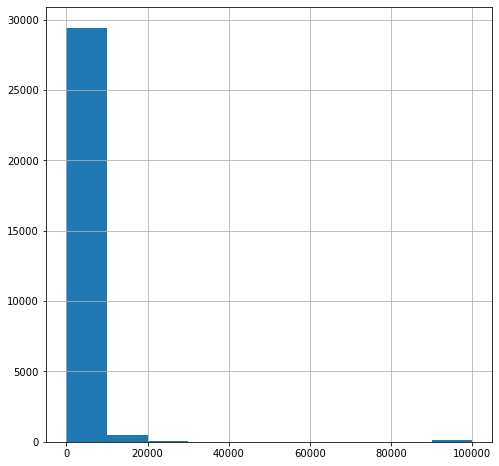

In [22]:
data["capital-gain"].hist(figsize=(8,8))
plt.show()

### **ii.	Description about distribution**


* This histogram shows that most of the "capital-gain" values are centered on 0 and few on 10k and 99k.
*  capital-gain is concentrated on the one particular value and other are spread with  large standard deviation(7452.01).
*  capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

## 5.1.5 capital-loss

### **i.	Distribution**

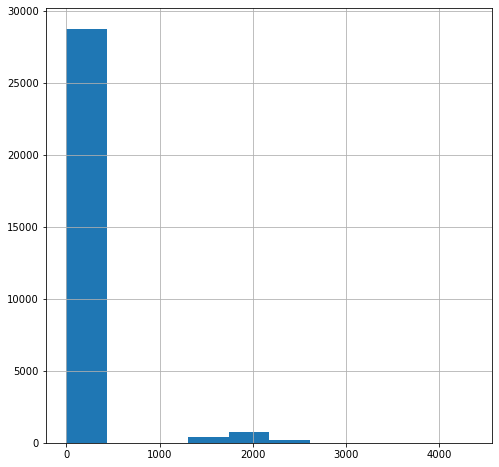

In [23]:
data["capital-loss"].hist(figsize=(8,8))
plt.show()

In [24]:
data[data["capital-loss"]>0].shape

(1427, 15)

### **ii.	Description about distribution**

* This histogram shows that most of the "capital-loss" values are centered on 0 and only few are non zero(2282).
* This attribute is similar to the capital-gain i.e. most of the values are centered on 0(nearly 43000 of them)

### Relation between capital gain and capital loss

#### Let's explore more about capital loss and capital gain.

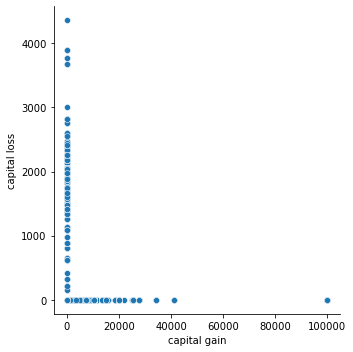

In [25]:
sns.relplot('capital-gain','capital-loss', data= data)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

Possibilities for capital gain and capital loss

*     Both capital gain and capital loss can be zero
*     If capital.gain is zero there is possibility of capital loss being high or above zero.
*     If capital loss is zero there is possibility of capital.gain being high or above zero.



**With the help of this, we can do one modification later(It could be combine these together i.e. capital-change = [capital-gain - capital-loss])**

## 5.1.6 Workclass

### **i.	Distribution**

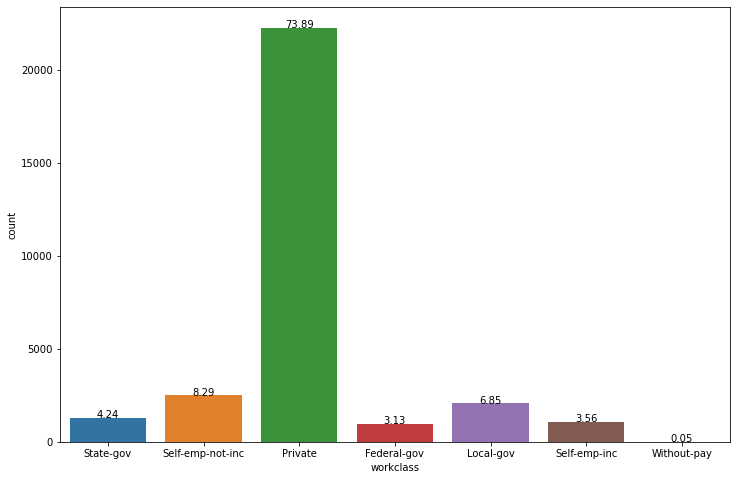

In [27]:
plt.figure(figsize=(12,8))

total = float(len(data["annual_income"]) )

ax = sns.countplot(x="workclass", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii.	Description about distribution**

Summary  distribution shows that:
* There are 8 unique categories present in the worclass attribute.
* Most of them belong to the *private* workclass(36705) i.e. 75.15%.
* *without-pay* and *never-worked* has minimum count in workclass attribute(less than 1%).
* There is huge imbalance in the categories of workclass attribute.

## 5.1.7 Education

### **i. Distribution**

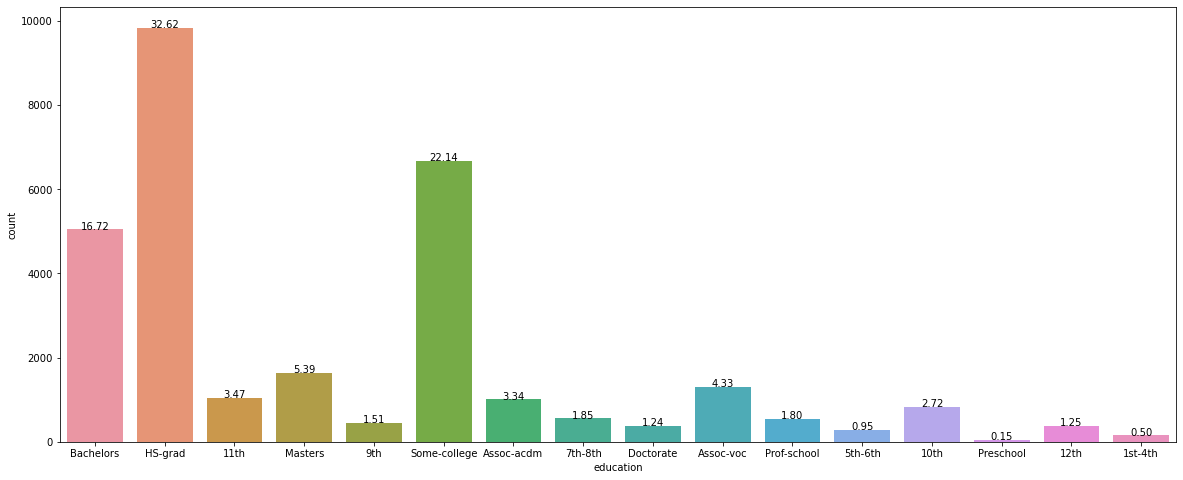

In [28]:
plt.figure(figsize=(20,8))
total = float(len(data["annual_income"]) )

ax = sns.countplot(x="education", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Description about distribution**


* There are 16 unique categories present in the **education** attribute.
* *Hs-grad* has 32.32% of all the education attribute.
* *HS-grad* (15784) has the maximum number of observations followed by *some-college*(10878) and *Bachelors*(8025).
* *Pre-school* has minimum samples i.e. 83.


## 5.1.8 marital-status

### **i. Distribution**

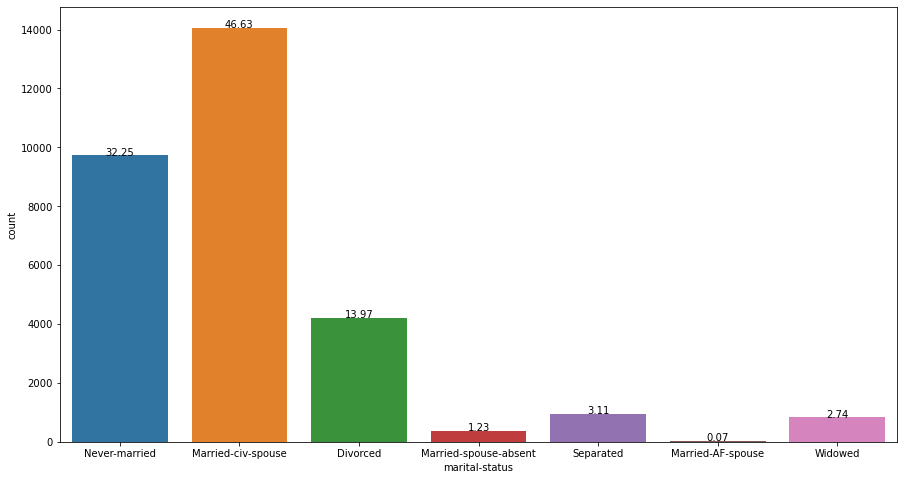

In [29]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="marital-status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Description about distribution**


* This *marital-status* attribute has 7 unique categories.
* Two of them are dominate over other categories(these are *Never-married*(33%) and *married-civ-spouse*(45.82%).
* *Married-civ-spouse* has maximum number of samples.
* *Married-AF-spouse* has minimum number of obs.


## 5.1.9 Occupation

### **i. Distribution**

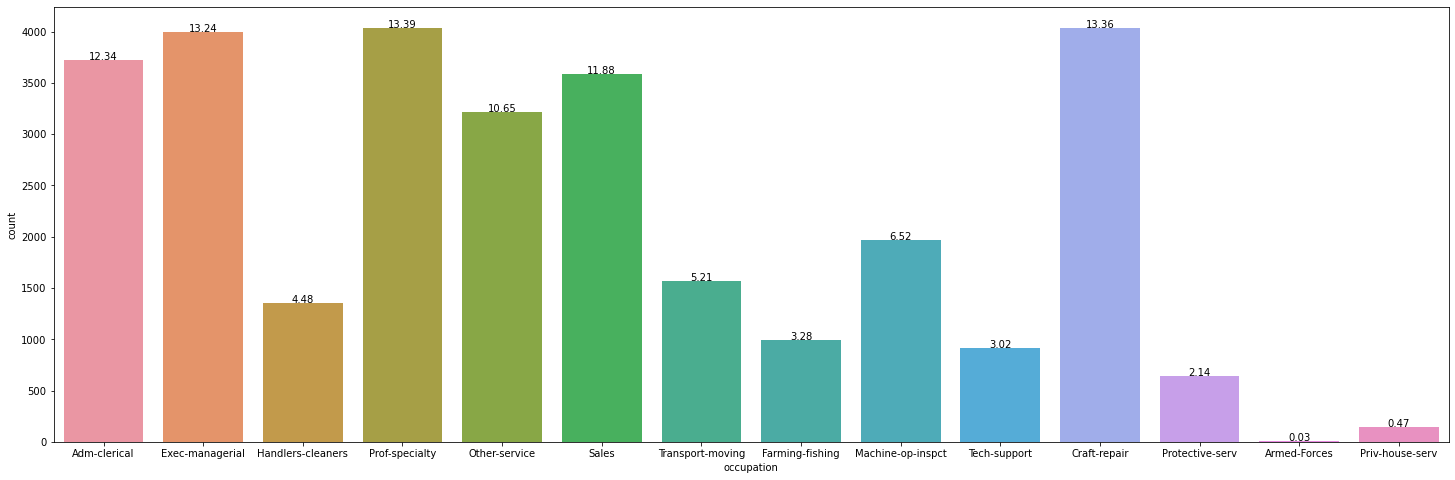

In [30]:
plt.figure(figsize=(25,8))
total = float(len(data) )

ax = sns.countplot(x="occupation", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Description about distribution**


* There are 14 unique categories present in the **occupation** attribute.
* *Prof-specialty* has the maximum count(8981) but *Craft-repair*, *Exec-managerial* and *Adm-clerical Sales* has comparable number of observations.
* *Armed-Forces * has minimum samples in the **occupation** attribute.

## 5.1.10 Relationship

### **i. Distribution**

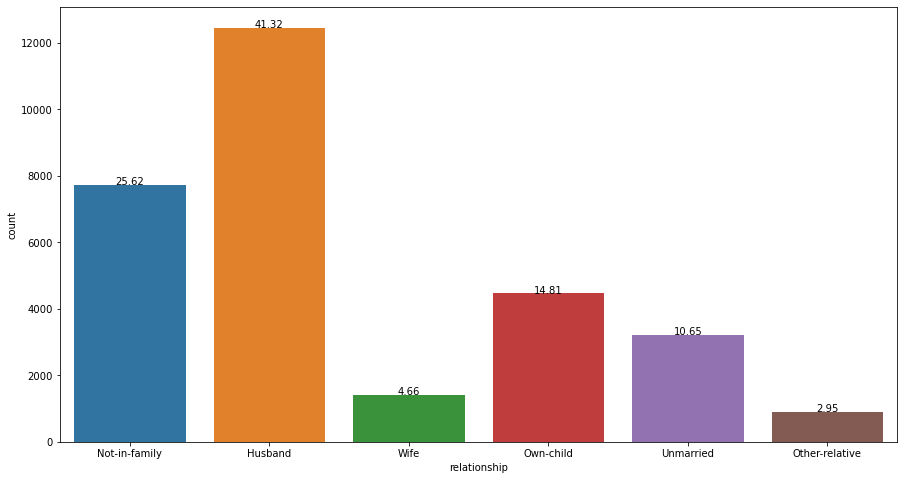

In [31]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="relationship", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Description about distribution**


* There are 6 unique categories in the **relationship** attribute.
* *Husband* has maximum percentage (40.37%) among all categories followed by *not-in-family*(25.76%)

## 5.1.11 Race

### **i. Distribution**

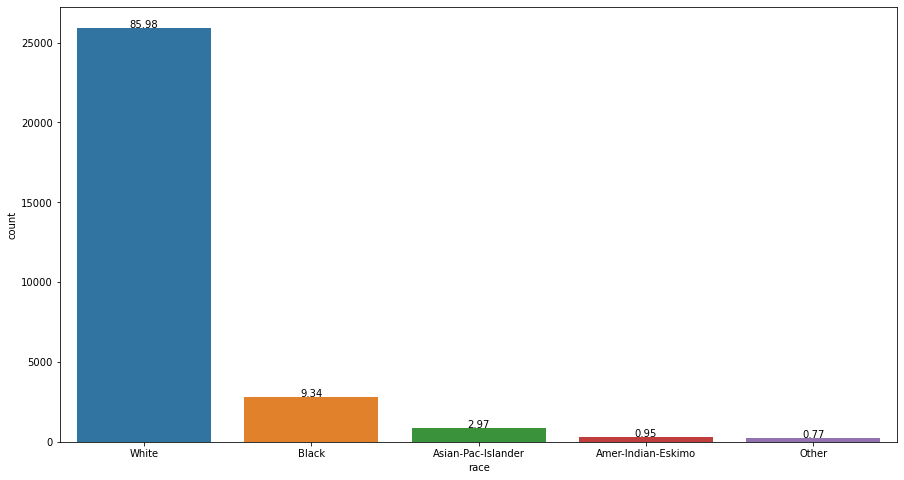

In [32]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="race", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Description about distribution**

This distribution explains that:
* There are 5 unique categories in the **race** attribute.
* Most of them are "white" which is roughly 85.50%.
* This dataset is totally bias toward the "white" race.
* Second major race in the dataset is the "black" with just 9.59%.

## 5.1.12 Gender

### **i. Distribution**

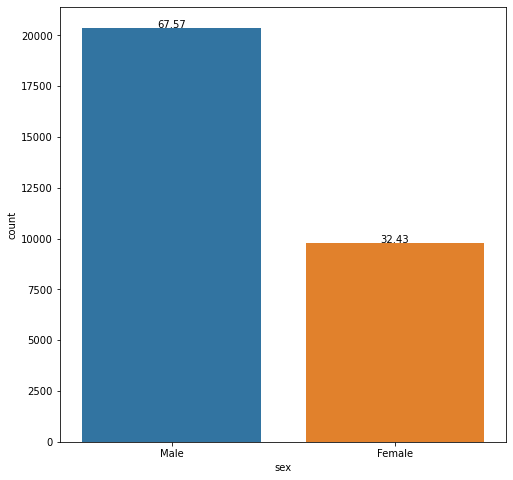

In [34]:
plt.figure(figsize=(8,8))
total = float(len(data) )

ax = sns.countplot(x="sex", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Description about distribution**

This distribution explains that:
* Gender has 2 unique categories(male and female).
* But the frequency of *male*(32650) is higher than the *female*(16192) categories.
* Distribution shows that this dataset is skewed toward the male with nearly 67%.

## 5.1.13 Native-country

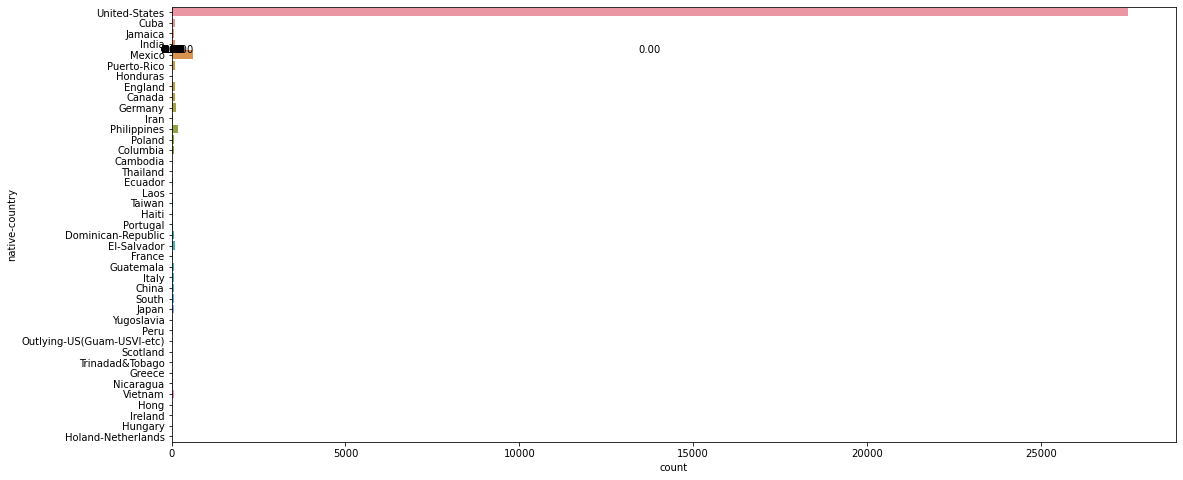

In [35]:
plt.figure(figsize=(18,8))
total = float(len(data) )

ax = sns.countplot(y="native-country", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

This distribution explains that:
* This dataset is taken from the US.
* As 91.5% of them have native country America and others are immigrants.

## 5.1.14 Income(Target variable)

### **i. Distribution**

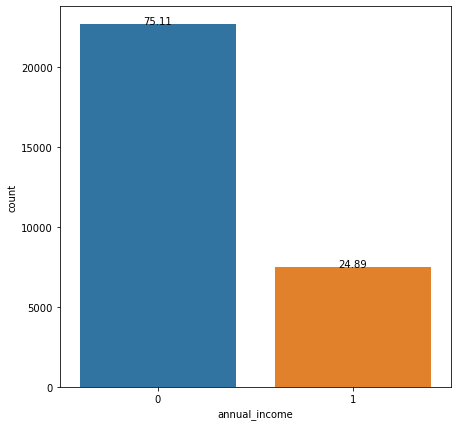

In [36]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="annual_income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### **ii. Description about distribution**

This distibution says that:
* **This dataset not balance , i.e. 23.93%of them are belong to income group 1 (who earns more than 50k) and 76% fall under the income group 0 (who earns less than 50k).**

# 5.2.Bivariate analysis

## 5.2.1 Age

### i. **Boxplot (Relationship with income)**

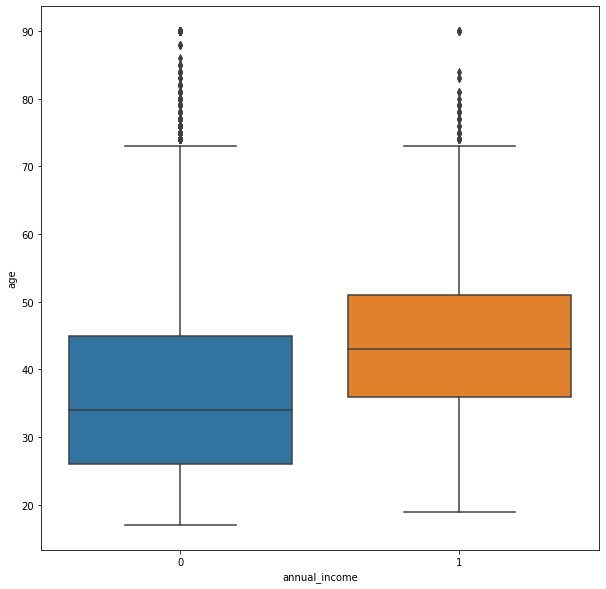

In [37]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="annual_income", y="age", data=data)
plt.show()

In [38]:
data[['annual_income', 'age']].groupby(['annual_income'], as_index=False).mean().sort_values(by='age', ascending=False)

,annual_income,age
1,1,43.95911
0,0,36.60806


    The mean "age" for Income group(<=50k) is 36.8 years.
    And for Income group(>50k) is 44.2 years

### ii. Description about boxplot

The above bivariate boxplot shows :
* Outliers present in both the income group(<=50k and >50k) wrt "age" attribute.
* Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).
* Interquartile range(IQR) :
   *   For Income group(<=50k) , IQR is between [25,46] (long range)
> Middle 50% of the Age is spread over longer range for the income group who earn <=50k.   
   *   For Income group(>50k) , IQR is between [38,50] (shorter range)

### iii. Hypothesis test (to test the relationship between income & Age )

**Two sampled T-test** :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

Example : is there any association between age and income



Determine a null and alternative hypothesis.

    In general, the null hypothesis will state that the two populations being tested have no statistically significant difference.
    The alternate hypothesis will state that there is one present.



In this example we can say that:
*  Null Hypothesis :- there is no difference in Mean age  of income group >50k and income group <=50k.
*  Alternate Hypothesis :- there is difference in Mean age of income group >50k and income group <=50k.


In [39]:
import random

data = data[(np.abs(stats.zscore(data["age"])) < 3)] 

income_1 = data[data['annual_income']==1]['age']
income_0 = data[data['annual_income']==0]['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [40]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 4.719556467214572
p value 4.516974015711719e-06
we reject null hypothesis


### iv. Final conclusion

Using statistical analysis,

    We can conclude that there is a significant difference in the mean ages of income group >50k and income group <=50k.
    It means that age has some contribution to the distinguish income groups.



## 5.2.2 Hours per week

### i. Boxplot (Relationship with income)

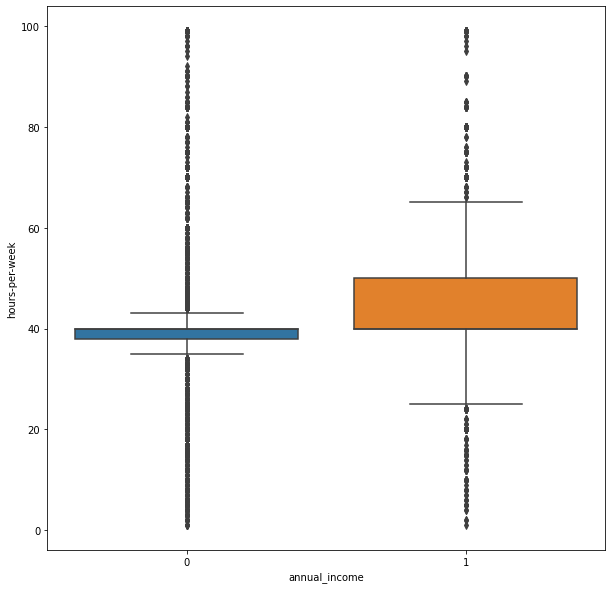

In [41]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="annual_income", y="hours-per-week", data=data)
plt.show()

### ii. Description about boxplot

Bivariate Analysis with the boxplot shows that:
* The median "hours-per-week" for Income group who earns >50k is greater than the Income group who earns <=50k.
>   **Interpretation**
    * Income group who earns >50k has spend ~44 "hours-per-week".(long hours)
    * Income group who earns <=50k has spend  ~37 "hours-per-week".
   
* The boxplot for Income group who earns <=50k has small range for minimum (q1-1.5* IQR) and maximum (q3+ 1.5* IQR) i.e.~[28,48].But the boxplot for Income group who earns >50k has large range for minimum (q1-1.5* IQR) and maximum (q3+ 1.5* IQR) i.e.~[23,68].
>   **Interpretation**
    *  Income group who earns >50k have flexible working hours
* More Outliers present in the Income group who earns <=50k.

### iii.  Hypothesis test (to test the relationship between income & hours-per-week )

In this example we can say that:

    Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
    Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.



In [42]:
data = data[(np.abs(stats.zscore(data["hours-per-week"])) < 3)] 

income_1 = data[data['annual_income']==1]["hours-per-week"]
income_0 = data[data['annual_income']==0]["hours-per-week"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',format(pval, '.70f'))

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 4.698103243393835
p value 0.0000049922762315573674846732980803221124688207055442035198211669921875
we reject null hypothesis


### iv.  Final conclusion

Using statistical analysis with the help of two sample t-test,

    We can conclude that there is difference in Mean of income group >50k and income group <=50k.
    It means that hours-per-week has some contribution to the distinguish income groups.



## 5.2.3 fnlwgt

### i. Boxplot (Relationship with income)

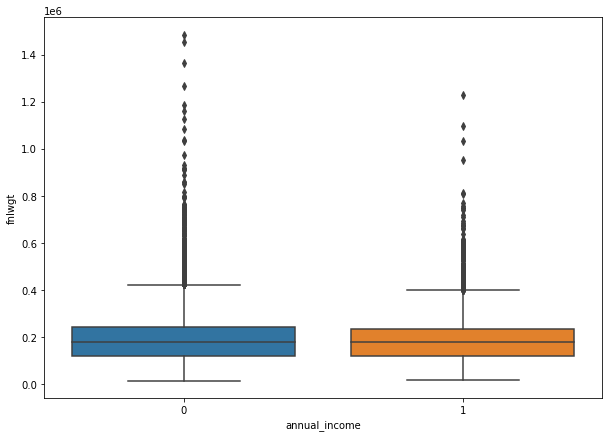

In [43]:
plt.figure(figsize=(10,7))
sns.boxplot(x="annual_income", y="fnlwgt", data=data)
plt.show()

### ii.  Description about boxplot

* As evident from the above plot, both income group has nearly same IQR and median is centered on 0.
* Outliers are present in both the income groups.
* It seems that the boxplot for final weight w.r.t income groups is similar except the number of outliers in income group who earns <=50k is more.

### iii. Hypothesis test (to test the relationship between income & fnlwgt)


    Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
    Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [44]:
data = data[(np.abs(stats.zscore(data["fnlwgt"])) < 3)] 

income_1 = data[data['annual_income']==1]["fnlwgt"]
income_0 = data[data['annual_income']==0]["fnlwgt"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest -0.4751037204011768
p-value 0.6352626235374258
we accept null hypothesis


### iv.  Final conclusion

Using statistical analysis with the help of two sample t-test,

    We can conclude that there is no difference in Mean of income group >50k and income group <=50k.
    It means that final weight has no contribution to the distinguish income group.



## 5.2.4 capital-gain

### i. Boxplot (Relationship with income)

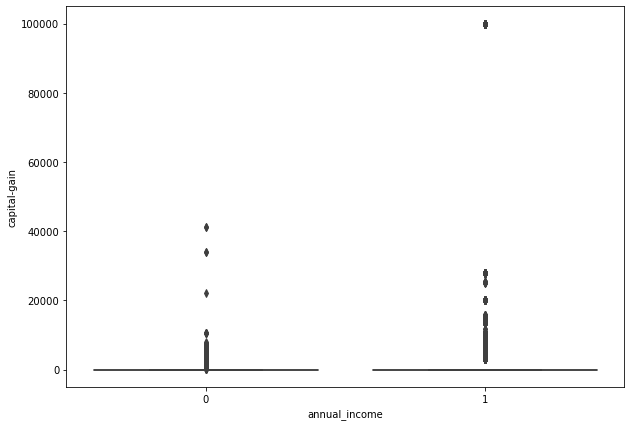

In [45]:
plt.figure(figsize=(10,7))
sns.boxplot(x="annual_income", y="capital-gain", data=data)
plt.show()

 ### ii. Description about boxplot

This boxplot tells us that:

    Most of the capital gains value is accumulated at 0 for both the income group .

### iii. Hypothesis test (to test the relationship between income & capital gain )

* Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
* Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [46]:
data = data[(np.abs(stats.zscore(data["capital-gain"])) < 3)] 

income_1 = data[data['annual_income']==1]["capital-gain"]
income_0 = data[data['annual_income']==0]["capital-gain"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.384508536581611
p-value 0.0009924412935741465
we reject null hypothesis


### iv.  Final conclusion

Using statistical analysis with the help of two sample t-test,

    We can conclude that there is difference in Mean of income group >50k and income group <=50k.

## 5.2.5. capital-loss

### i. Boxplot (Relationship with income)

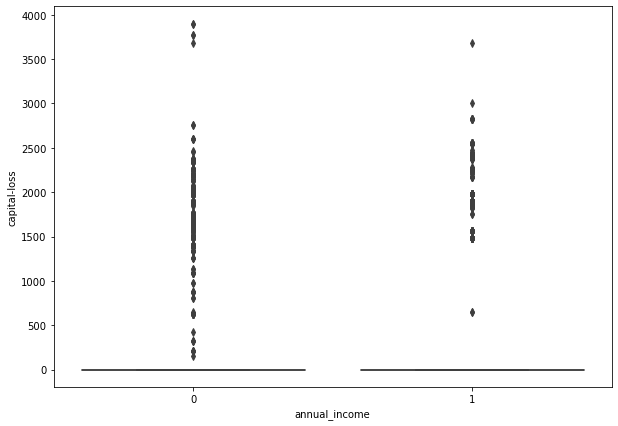

In [47]:
plt.figure(figsize=(10,7))
sns.boxplot(x="annual_income", y="capital-loss", data=data)
plt.show()

### ii. Description about boxplot

This boxplot is similar to the capital gain boxplot where most of the values are concentrated on 0.

### iii. Hypothesis test (to test the relationship between income & capital loss )


    Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
    Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [48]:
income_1 = data[data['annual_income']==1]["capital-loss"]
income_0 = data[data['annual_income']==0]["capital-loss"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 2.374783469183822
p-value 0.01889318504208454
we reject null hypothesis


### iv. Final conclusion

Using statistical analysis with the help of two sample t-test,

    We can conclude that there is no difference in Mean capital loss of income group >50k and income group <=50k.
    It means that capital-loss is unable to seperate the income groups.

## 5.2.6 Workclass

### i. Plot (Relationship with income)

posx and posy should be finite values
posx and posy should be finite values


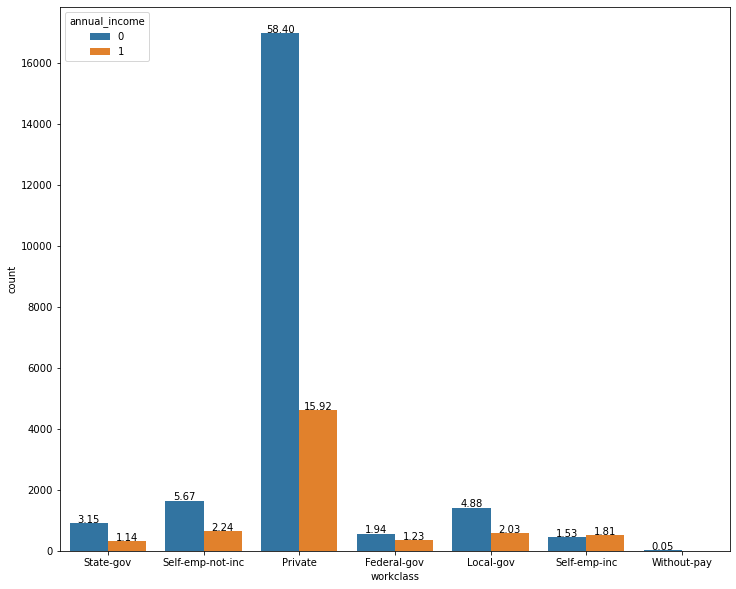

In [49]:
plt.figure(figsize=(12,10))
total = float(len(data["annual_income"]) )

ax = sns.countplot(x="workclass", hue="annual_income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### ii. Description about plot

This plot shows that:

*     In private workclass most of the people(59.48%) earn <=50k(belong to income group 0).
*     self-emp-inc workclass is only where more people earn >50k(belong to income group 1).
*     In Federal-gov workclass nearly more than half of the people earn >50k.

### iii.  Hypothesis test (to test the relationship between income & workclass)

**Chi-square goodness of fit**

A chi-square goodness of fit test allows us to test whether the observed proportions for a categorical variable differ from hypothesized proportions. The chi-square statistical test is used to determine whether there’s a significant difference between an expected distribution and an actual distribution.
* For example, let’s suppose that we believe that the general population consists of 70% private workclass, 10% local-gov, 10% self-emp-not-inc and 10% self-emp-inc. We want to test whether the observed proportions from our sample differ significantly from these hypothesized proportions. 

In [50]:
# contingency table
c_t = pd.crosstab(data['workclass'].sample(frac=0.002, replace=True, random_state=1),data['annual_income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual_income,0,1
workclass,,
Local-gov,3,2
Private,29,9
Self-emp-inc,2,0
Self-emp-not-inc,4,2
State-gov,6,1


The table was called a contingency table, by Karl Pearson, because the intent is to help determine whether one variable is contingent upon or depends upon the other variable. For example, does an interest in **workclass** depend on **income**, or are they independent?

This is challenging to determine from the table alone; instead, we can use a statistical method called the **Pearson’s Chi-Squared test**.

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

    If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
    If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

Here, In this example

*     **H0(Null Hypothesis)** : There is no relationship between workclass and income.
*     **H1(Alternate Hypothesis)** : There is a relationship between workclass and income.

In [51]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=4
p_value 0.7402170192387978
[[ 3.79310345  1.20689655]
 [28.82758621  9.17241379]
 [ 1.51724138  0.48275862]
 [ 4.55172414  1.44827586]
 [ 5.31034483  1.68965517]]
probability=0.950, critical=9.488, stat=1.976
Independent (fail to reject H0)


### iv.  Final conclusion



With the help of Chi-Squared test,

    As we have accept the H0, that there is no relationship between these two categorical variable.
    We can conclude that is no dependency of "workclass" attribute on the target variable "income

## 5.2.7 Education

### i. Plot (Relationship with income)

posx and posy should be finite values
posx and posy should be finite values


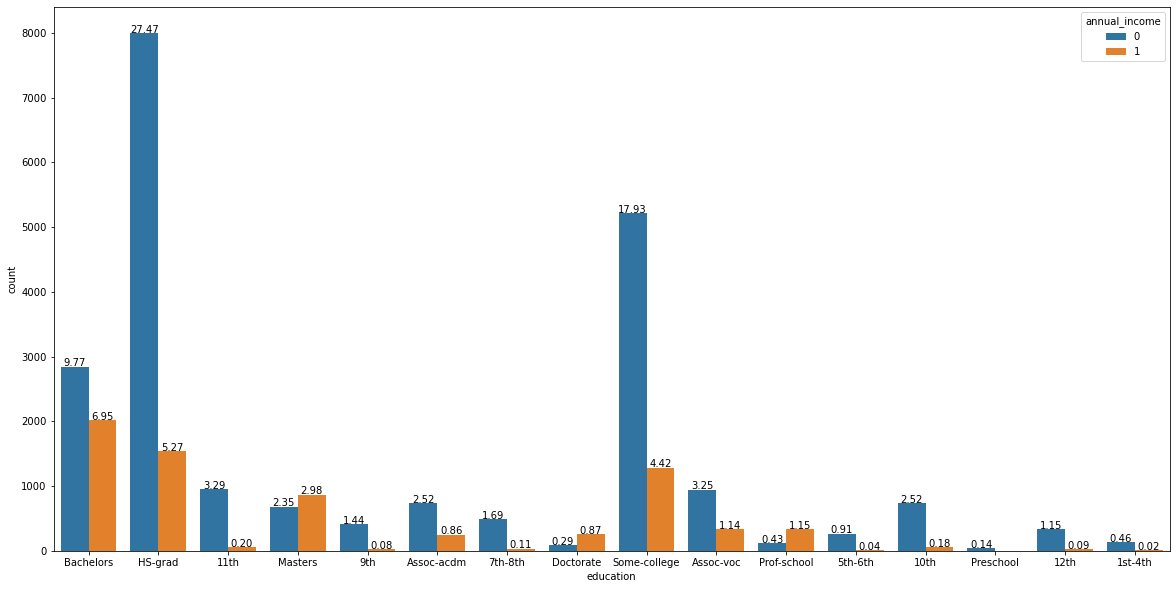

In [52]:
plt.figure(figsize=(20,10))
total = float(len(data["annual_income"]) )

ax = sns.countplot(x="education", hue="annual_income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### ii. Description about plot

This plot shows that:

*     Despite the fact that most of the categories fall under the HS-grad but the interesting thing is only 5.12% of all people belong to the income group 1(i.e. earns more than 50k), surprisely less than the categories fall under the Bachelors which is 6.78%.
*     There only few categories in "education" attribute whose percentage to fall under income group 1 is greater than the falling under income group 0.
*     These are prof-school, masters and doctorate.
*     We can also infer that higher eduction may provide better earnings.

### iii. Hypothesis test (to test the relationship between income & education)

Here, In this example

    H0(Null Hypothesis) : There is no relationship between education and income.
    H1(Alternate Hypothesis) : There is a relationship between education and income

In [53]:
# contingency table
c_t = pd.crosstab(data['education'].sample(frac=0.002, replace=True, random_state=1),data['annual_income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual_income,0,1
education,,
10th,1,0
12th,1,0
5th-6th,0,1
7th-8th,1,0
Assoc-acdm,1,0
Assoc-voc,2,1
Bachelors,6,3
Doctorate,0,1
HS-grad,24,3


In [54]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print("p-value", p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=10
p-value 0.027985051784219617
[[ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 2.27586207  0.72413793]
 [ 6.82758621  2.17241379]
 [ 0.75862069  0.24137931]
 [20.48275862  6.51724138]
 [ 2.27586207  0.72413793]
 [ 7.5862069   2.4137931 ]]
probability=0.950, critical=18.307, stat=20.137
Dependent (reject H0)


### iv.  Final conclusion

With the help of Chi-Squared test,

*     As we have rejected the H0, that there is no relationship between these two categorical variable.
*     We can conclude that is some dependency of "education" attribute on the target variable "income"

## 5.2.8 Marital-status

### i. Plot (Relationship with income)

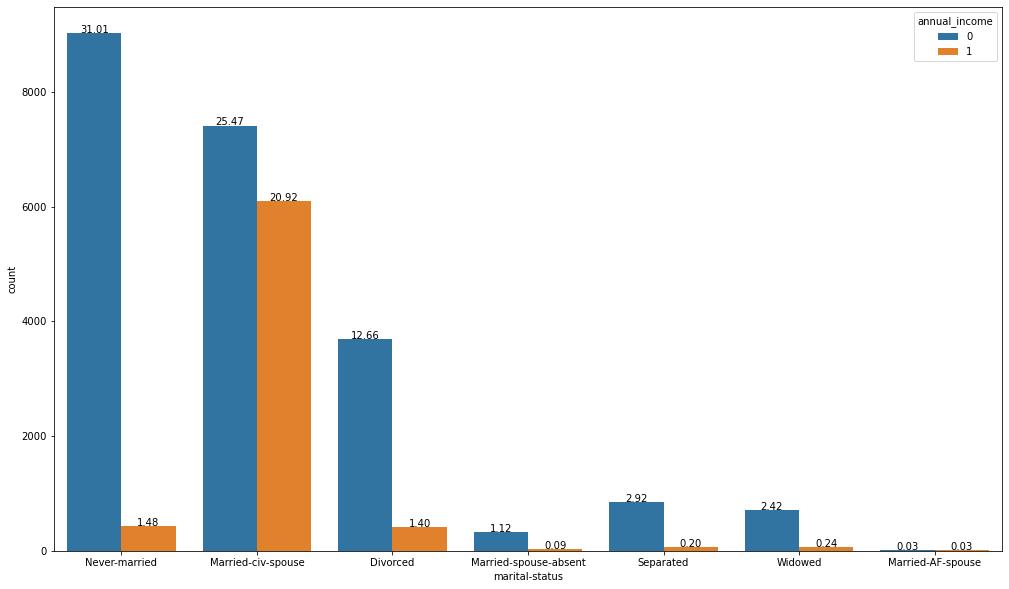

In [56]:
plt.figure(figsize=(17,10))
total = float(len(data) )

ax = sns.countplot(x="marital-status", hue="annual_income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### ii. Description about plot

This countplot explain following things:

*     Married-civ-spouse has the highest percentage(20.44%) of falling under the income group 1(>50k).
*     Despite the fact that we have 16117 observation in the marital-status attribute(which is sec. highest) but only 1.5% of the people of "Never-married" earn more than 50k.
*     Married-spouse-absent and Married-AF-spouse has negligible contribution to the fall under income group 1.

### iii. Hypothesis test (to test the relationship between income & marital-status)

Here, In this example

*     **H0(Null Hypothesis)** : There is no relationship between marital-status and income.
*     **H1(Alternate Hypothesis)** : There is a relationship between marital-status and income.

In [57]:
# contingency table
c_t = pd.crosstab(data['marital-status'].sample(frac=0.002, replace=True, random_state=1),data['annual_income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual_income,0,1
marital-status,,
Divorced,10,0
Married-civ-spouse,16,11
Never-married,15,2
Separated,2,1
Widowed,1,0


In [58]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
p_value 0.058066654630864176
[[ 7.5862069   2.4137931 ]
 [20.48275862  6.51724138]
 [12.89655172  4.10344828]
 [ 2.27586207  0.72413793]
 [ 0.75862069  0.24137931]]
probability=0.950, critical=9.488, stat=9.124
Independent (fail to reject H0)


### iv. Final conclusion

With the help of Chi-Squared test,

* As we have rejected the H0, that there is no relationship between these two categorical variable.
* We can conclude that is some dependency of "marital-status" attribute on the target variable "income"

## 5.2.9 Occupation

### i. Plot (Relationship with income)

posx and posy should be finite values
posx and posy should be finite values


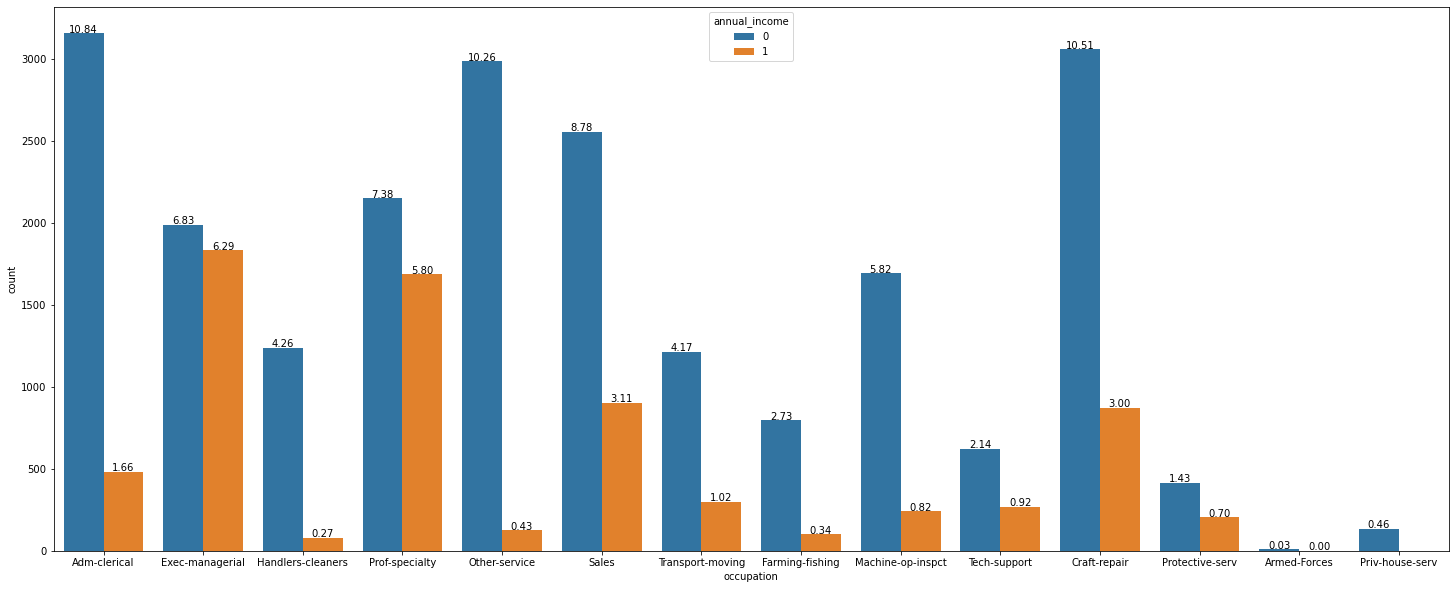

In [59]:
plt.figure(figsize=(25,10))
total = float(len(data) )

ax = sns.countplot(x="occupation", hue="annual_income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### ii. Description about plot

This countplot explain following things:

*     Prof-specialty has maximum percentage that fall in both income group 0 and 1 in whole categories with 12.15% and 6.24% respectively.
*     There is an interesting thing to look in this plot which is no occupation has greater percentage of falling in income group 1 than the income group 0. i.e. in every occupation, people who earn less than 50k is greater than people who earn >50k.

### iii. Hypothesis test (to test the relationship between income & occupation)

Here, In this example

    H0(Null Hypothesis) : There is no relationship between occupation and income.
    H1(Alternate Hypothesis) : There is a relationship between occupation and income.

In [60]:
# contingency table
c_t = pd.crosstab(data['occupation'].sample(frac=0.002, replace=True, random_state=1),data['annual_income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual_income,0,1
occupation,,
Adm-clerical,11,1
Craft-repair,9,3
Exec-managerial,4,2
Farming-fishing,1,0
Handlers-cleaners,3,0
Machine-op-inspct,2,0
Other-service,5,0
Prof-specialty,4,5
Protective-serv,2,1


In [61]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=10
[[9.10344828 2.89655172]
 [9.10344828 2.89655172]
 [4.55172414 1.44827586]
 [0.75862069 0.24137931]
 [2.27586207 0.72413793]
 [1.51724138 0.48275862]
 [3.79310345 1.20689655]
 [6.82758621 2.17241379]
 [2.27586207 0.72413793]
 [3.03448276 0.96551724]
 [0.75862069 0.24137931]]
probability=0.950, critical=18.307, stat=13.553
Independent (fail to reject H0)


### iv. Final conclusion

With the help of Chi-Squared test,

*     As we have rejected the H0, that there is no relationship between these two categorical variable.
*     We can conclude that is some dependency of "occupation" attribute on the target variable "income"

## 5.2.10 Relationship

### i. Plot (Relationship with income)

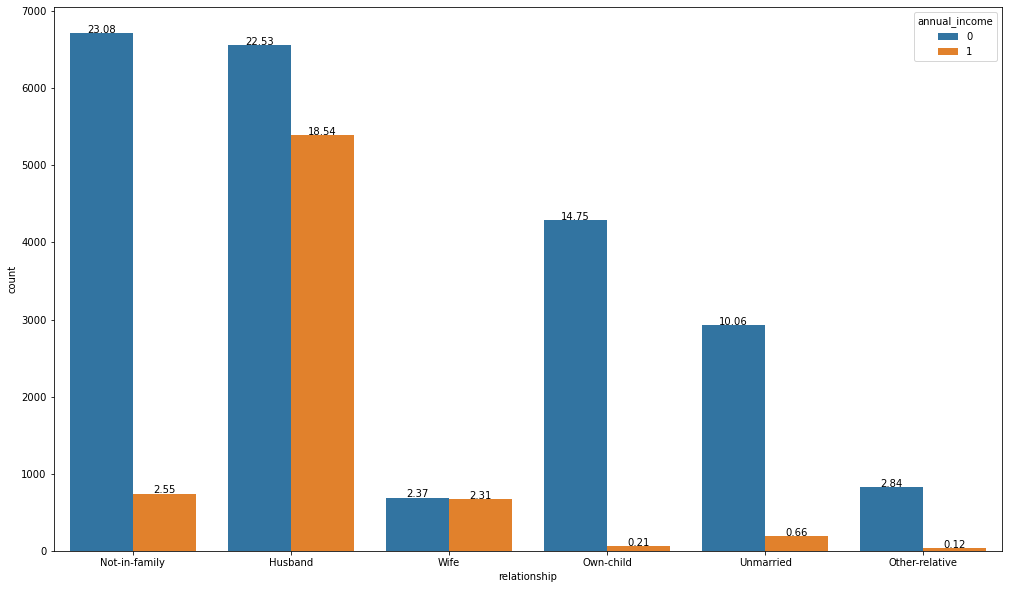

In [62]:
plt.figure(figsize=(17,10))
total = float(len(data))

ax = sns.countplot(x="relationship", hue="annual_income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### ii. Description about plot

This countplot explain following things:

*     husbands has the highest percentage(18.11%) of earning more than 50k in all the other categories.
*     One thing to notice is that "not-in-family" has highest percentage(23.15%) to earn less than 50k but they had nearly same percentage(2.61%) as of the "wife"(2.24%) category. This comparsion is done due to fact that "wife" category has only 2.53% to fall under the income group 0.
*     "own-child" and "other-relative" has the minimum percentage to fall under the income group 1 i.e. 0.23% and 0.11% respectively.
*     There is huge difference between the percentage of fall either groups except for "husband" and "wife".

### iii. Hypothesis test (to test the relationship between income & relationship)

Here, In this example

*     **H0(Null Hypothesis)** : Both the relationship and income variables are independent to each other.
*     **H1(Alternate Hypothesis)** : There is a dependent to each other.

In [63]:
# contingency table
c_t = pd.crosstab(data['relationship'].sample(frac=0.002, replace=True, random_state=1),data['annual_income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual_income,0,1
relationship,,
Husband,14,10
Not-in-family,14,3
Other-relative,1,0
Own-child,7,0
Unmarried,7,0
Wife,1,1


In [64]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
[[18.20689655  5.79310345]
 [12.89655172  4.10344828]
 [ 0.75862069  0.24137931]
 [ 5.31034483  1.68965517]
 [ 5.31034483  1.68965517]
 [ 1.51724138  0.48275862]]
probability=0.950, critical=11.070, stat=9.921
Independent (fail to reject H0)


### iv. Final conclusion

With the help of Chi-Squared test,

*     As we have rejected the H0, that there are independent to each other..
*     We can conclude that is some dependency of "relationship" attribute on the target variable "income"


## 5.2.11 Race

### i.  Plot (Relationship with income)

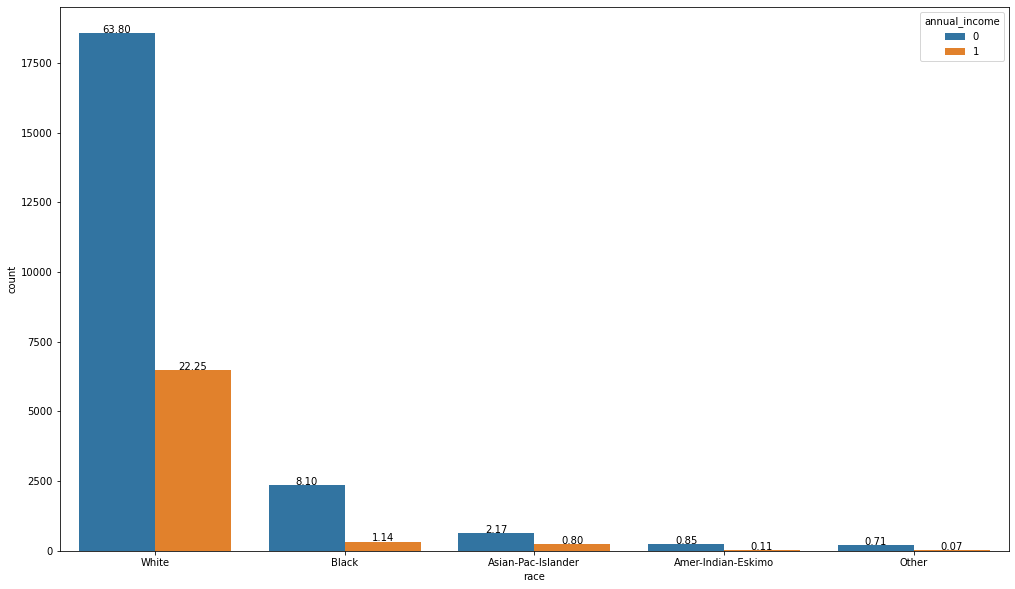

In [65]:
plt.figure(figsize=(17,10))
total = float(len(data) )

ax = sns.countplot(x="race", hue="annual_income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### ii. Description about plot

This countplot explain following things:

*     The relationship of "white" race with "income" can easily guess based on previous summary statistics.
*     There is huge difference between the percentage of fall either groups for each "race" except for the "other"(.63%) and "amer-indian-eskimo"(.74%) but this could be due the lesser number of observations for those categories.

### iii. Hypothesis test (to test the relationship between income & race)

Here, In this example

*     **H0(Null Hypothesis)** : There is no relationship between race and income.
*     **H1(Alternate Hypothesis)** : There is a relationship between race and income.

In [66]:
# contingency table
c_t = pd.crosstab(data['race'].sample(frac=0.002, replace=True, random_state=1),data['annual_income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual_income,0,1
race,,
Amer-Indian-Eskimo,1,0
Asian-Pac-Islander,3,0
Black,2,0
Other,1,0
White,37,14


In [67]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
p_value 0.6387406763981135
[[ 0.75862069  0.24137931]
 [ 2.27586207  0.72413793]
 [ 1.51724138  0.48275862]
 [ 0.75862069  0.24137931]
 [38.68965517 12.31034483]]
probability=0.950, critical=9.488, stat=2.533
Independent (fail to reject H0)


### iv. Final conclusion

With the help of Chi-Squared test,

*     As we have accept the H0, that there is no relationship between these two categorical variable.
*     We can conclude that is no dependency of "race" attribute on the target variable "income"

## 5.2.12 Gender

### i. Plot (Relationship with income)

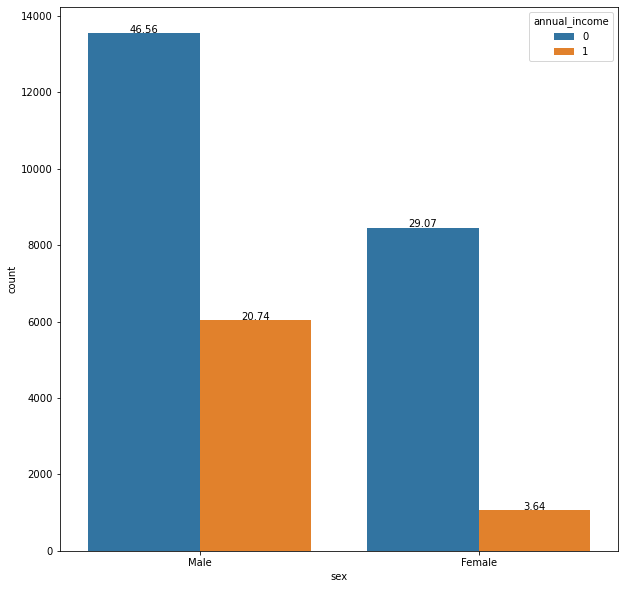

In [69]:
plt.figure(figsize=(10,10))
total = float(len(data) )

ax = sns.countplot(x="sex", hue="annual_income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### ii. Description about plot

This countplot explain following things:

*     For "female" earning more than 50k is rare with only 3.62% of all observations.
*     But for male, 20.31% of all people earn more than 50k .

### iii. Hypothesis test (to test the relationship between income & gender)

Here, In this example

*     **H0(Null Hypothesis)** : There is no relationship between gender and income.
*     **H1(Alternate Hypothesis**) : There is a relationship between gender and income.

In [70]:
# contingency table
c_t = pd.crosstab(data['sex'].sample(frac=0.002, replace=True, random_state=1),data['annual_income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

annual_income,0,1
sex,,
Female,14,2
Male,30,12


In [71]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
p_value 0.34972784766943044
[[12.13793103  3.86206897]
 [31.86206897 10.13793103]]
probability=0.950, critical=3.841, stat=0.874
Independent (fail to reject H0)


### iv. Final conclusion

With the help of Chi-Squared test,

*     As we have rejected the H0, that there is no relationship between these two categorical variable.
*     We can conclude that is some dependency of "gender" attribute on the target variable "income"

## 5.2.12 Native-country

### i. Hypothesis test (to test the relationship between income & native-country)

Here, In this example

*     **H0(Null Hypothesis)** : There is no relationship between native-country and income.
*     **H1(Alternate Hypothesis)** : There is a relationship between native-country and income.

In [72]:
# contingency table
c_t = pd.crosstab(data['native-country'].sample(frac=0.002, replace=True, random_state=1),data['annual_income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 

In [73]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=6
p_value 0.10029948408650134
[[ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [ 0.75862069  0.24137931]
 [39.44827586 12.55172414]]
probability=0.950, critical=12.592, stat=10.636
Independent (fail to reject H0)


### ii. Final conclusion

With the help of Chi-Squared test,

* As we have accept the H0, that there is no relationship between these two categorical variable.
* We can conclude that is no dependency of "native-country" attribute on the target variable "income"


## 5.3	Some multivariate relationships

### **5.3.1 Correlation among the numeric variables.**

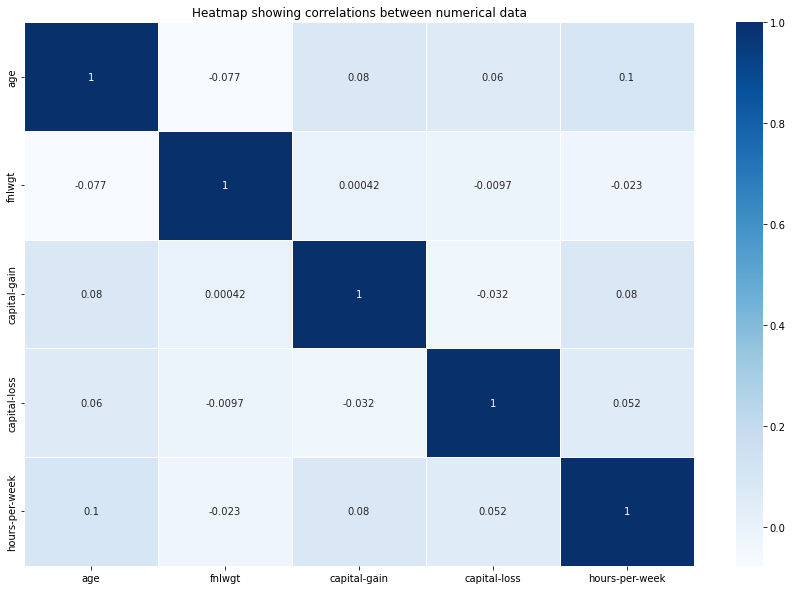

In [74]:
plt.figure(figsize=(15,10))  
sns.heatmap(data_num.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

* There is no strong correlation among the numeric attributes.
* There is neither strong positive nor strong negative correlation present in any variable .
* The strongest correlation is present between capital gain and hours-per-week with Coefficient .082.(which is less than 0.1, it means that very small correlation among them).


### **5.3.2 Multivariate Analysis between "income", "hours-per-week", "gender"**

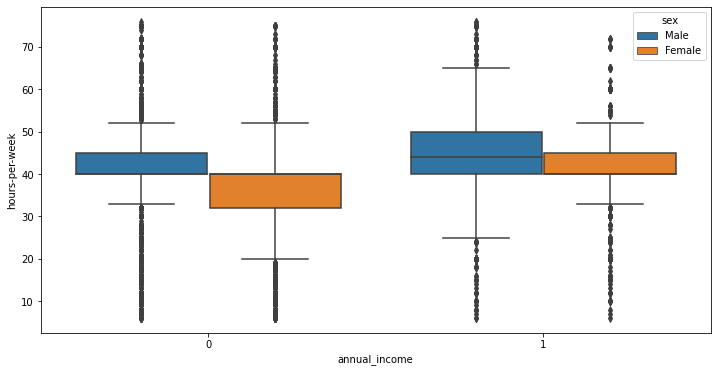

In [76]:
plt.figure(figsize=(12,6))
sns.boxplot(x='annual_income',y ='hours-per-week', hue='sex',data=data)
plt.show()

* The median "hours-per-week" for females is lower than the males in the Income group who earns <=50k.
* Boxplot range for Income group who earns <=50k [minimum (q1-1.5* IQR) and maximum (q3+ 1.5* IQR)] i.e.
  * Male ~[32,52]
  * Female ~[17,57]
  
> **Interpretation**

     Females have more flexible working hours per week in the income groups who earns <=50k
* Boxplot range for Income group who earns >50k [minimum (q1-1.5* IQR) and maximum (q3+ 1.5* IQR)] i.e.
  * Male ~[23,63]
  * Female ~[30,57]
  
> **Interpretation**
 
     Males have more flexible working hours per week in the income groups who earns <=50k

### ** 5.3.3 Multivariate analysis between "income", "age", "gender"**

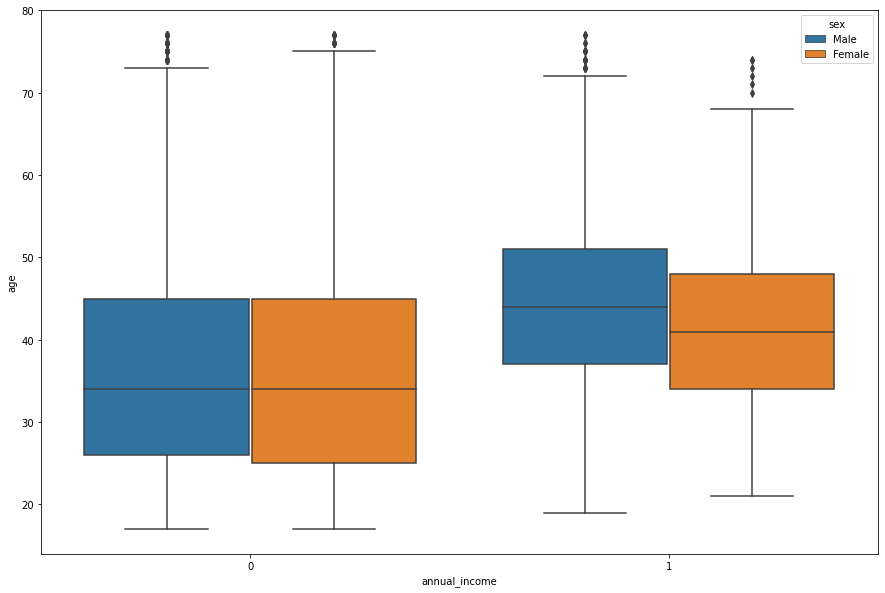

In [77]:
plt.figure(figsize=(15,10))
sns.boxplot(x="annual_income", y="age",hue="sex",data=data)
plt.show()

Multivariate analysis between "income", "age", "gender" shows that:
*   Median "age" of Females who earn less than 50k has very minute difference than the Median "age" of males who earn less than 50k.
*   But the Median "age" of Females who earn greater than 50k has age difference of 2-3years than the Median "age" of males who earn greater than 50k.


### Other Mutlivariate analysis 

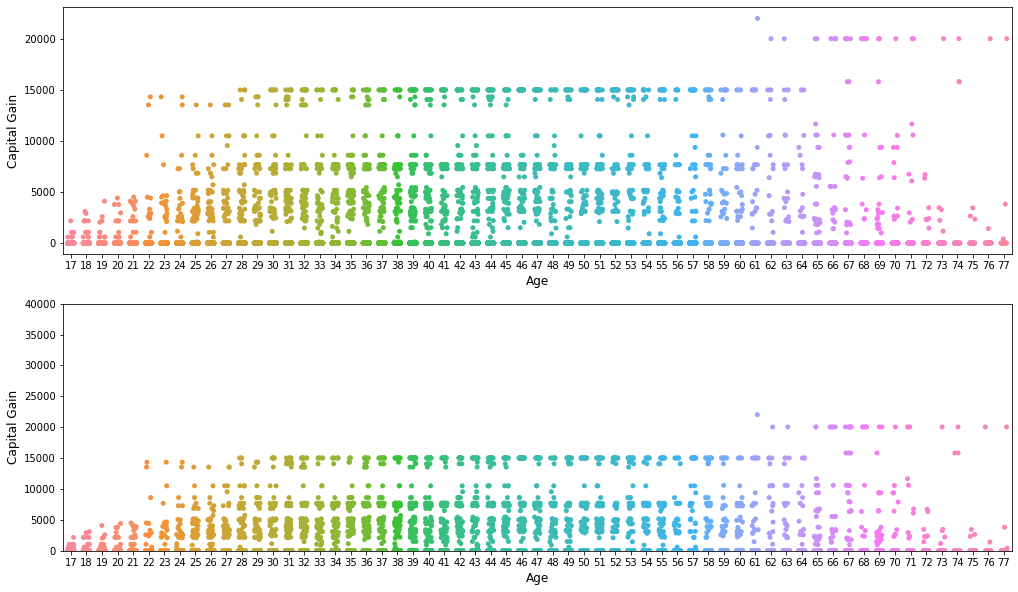

In [78]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital-gain', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital-gain', data = data,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

> **Explanation:**
*     Between age 28 and 64 capital gain is upto 15000 and after that it decreases and again increments at age 90
*     Age 90 doesn't follow the pattern.
*     Capital.gain of 99999 is clearly a outlier .

In [79]:
cols = ['workclass','occupation']
cat_col = data.dtypes[data.dtypes == 'object']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(data[data['age'] == 90][col].value_counts())
    else:
        continue

=======================================workclass=========================
Series([], Name: workclass, dtype: int64)
=======================================occupation=========================
Series([], Name: occupation, dtype: int64)


**At age 90 people can't work in goverment or private sectors. But there are some observations present in our dataset which shows that despite the age of 90 years they work in those sectors.**


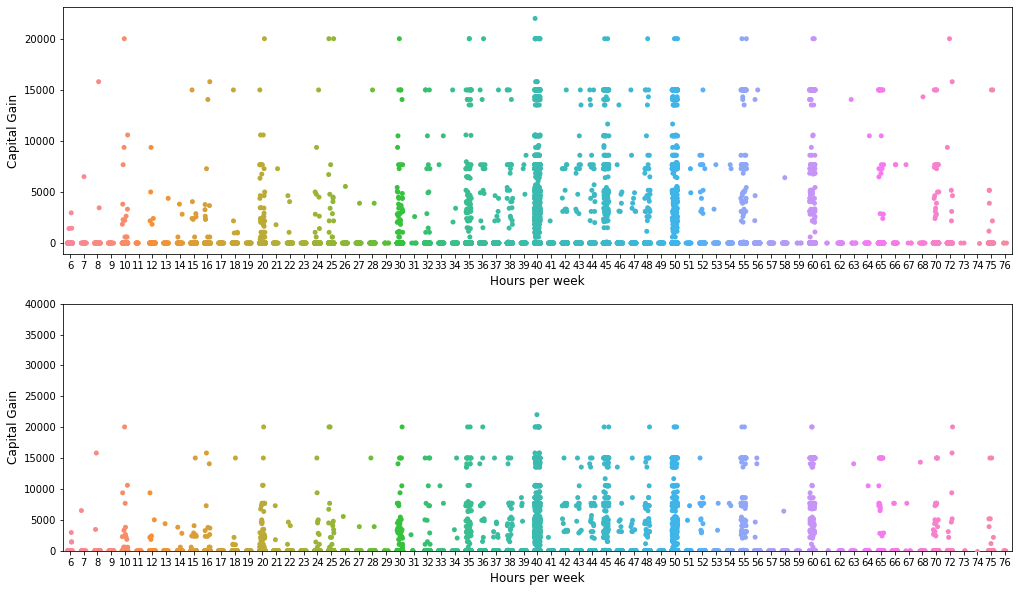

In [80]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('hours-per-week', 'capital-gain', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('hours-per-week', 'capital-gain', data = data,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

> **Explanation:**
*   Majority of people can be seen working for 40,50 and 60 hours per week and capital gain seems to be increasing.
*   There are few people working for 99 hours per week but doesn't seem to make high capital gain. Conversely people working below 40 hours per week are making high capital gains.

In [81]:
cols = ['workclass','occupation']
cat_col = data.dtypes[data.dtypes == 'object']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(data[data['hours-per-week'] == 99][col].value_counts())
    else:
        continue

=======================================workclass=========================
Series([], Name: workclass, dtype: int64)
=======================================occupation=========================
Series([], Name: occupation, dtype: int64)


## 5.3.4 Making new variable(capital_change)

### **i. Summary statistics**

In [82]:
data["capital_change"] = data["capital-gain"] - data["capital-loss"]
data["capital_change"].describe()

count    29105.000000
mean       465.122762
std       2358.066877
min      -3900.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      22040.000000
Name: capital_change, dtype: float64

### **ii. Distribution**

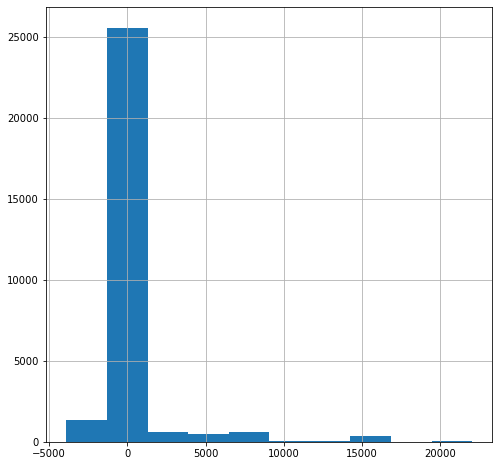

In [83]:
data["capital_change"].hist(figsize=(8,8))
plt.show()

### **iii. Description about summary & Distribution**

The summary statistics and distribution of **capital_change** shows that:
* It is similar summary stats and distribution to the capital gain and capital loss.
* This suggest that , we may replace these two features with one feature called **capital_change**

### **iv. Hypothesis test (to test the relationship between income & capital change)**

* Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
* Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [84]:
income_1 = data[data['annual_income']==1]["capital_change"]
income_0 = data[data['annual_income']==0]["capital_change"]

data = data[(np.abs(stats.zscore(data["age"])) < 3)] 

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 50)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 50)

ttest,pval = ttest_ind(income_1,income_0, equal_var=0)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 1.795481649731636
p-value 0.076270432686825
we accept null hypothesis


### **v. Final conclusion**



Using statistical analysis with the help of two sample t-test,

    We can conclude that there is difference in Mean of income group >50k and income group <=50k.
    Hence, we can replace capital-gain and capital-loss with capital-change.



## **6. Conclusion of Complete EDA**

Feature Removal:

    1. Education num and education are giving similar information.
    2. Using capital-gain and capital loss , we can make new variable called capital-change.


Outliers Summary:

    1. Capital gain of 99999 doesn't follow any pattern and from graph above it clearly distinguishes to be an outlier.
    2. Our dataset has people with age 90 and working for 40 hours per week in goverment or private sectors which is rare.



Other conclusion:

    1. This dataset not balance , i.e. 76% of them are belong to income group 1 (who earns more than 50k) and 23.93% fall under the income group 0 (who earns less than 50k).
    
    2. Females have more flexible working hours per week in the income groups who earns <=50k.
    
    3. Males have more flexible working hours per week in the income groups who earns >50k.
    
    4. The Median "age" of Females who earn greater than 50k has age difference of 2-3years(lower) than the Median "age" of males who earn greater than 50k.
    
    5. Generally people can be seen working for 30 hours to 40 hours per week. 
    
    6. Income group who earns >50k have flexible working hours.
    
    7. For "female" earning more than 50k is rare with only 3.62% of all observations.
       But for male, 20.31% of all people earn more than 50k .
       
    8. self-emp-inc workclass is only where more people earn >50k(belong to income group 1).
    
    9. People having degree doctorate,prof-school,masters are making salary more than 50K(it can be concluded that higher education means more salary).
  
Attributes affecting the target feature:
    
    Age 
    Hours per week
    capital-change
    workclass
    Education
    marital-status
    occupation
    relationship
    race
    gender
    native-country


## Selecting Features

In [85]:
# Convert Sex value to 0 and 1
data["sex"] = data["sex"].map({"Male": 0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)
data["marital-status"] = data["marital-status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
data["marital-status"] = data["marital-status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
data["marital-status"] = data["marital-status"].map({"Married":1, "Single":0})
data["marital-status"] = data["marital-status"].astype(int)

# Drop the data you don't want to use
data.drop(labels=["workclass","education","occupation","relationship","race","native-country", "capital_change"], axis = 1, inplace = True)

In [86]:
data.head()

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,annual_income
0,39,77516,13,0,0,2174,0,40,0
1,50,83311,13,1,0,0,0,13,0
2,38,215646,9,0,0,0,0,40,0
3,53,234721,7,1,0,0,0,40,0
4,28,338409,13,1,1,0,0,40,0


In [87]:
data.columns

Index(['age', 'fnlwgt', 'education-num', 'marital-status', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'annual_income'],
      dtype='object')

## Model Building

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [89]:
array = data.values
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size=validation_size)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 4 Algorithms (LR, KNN, CART, GNB, RFC)
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)))

# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Split Data: X
[[    39  77516     13 ...   2174      0     40]
 [    50  83311     13 ...      0      0     13]
 [    38 215646      9 ...      0      0     40]
 ...
 [    58 151910      9 ...      0      0     40]
 [    22 201490      9 ...      0      0     20]
 [    52 287927      9 ...  15024      0     40]]
Split Data: Y
[0 0 0 ... 0 0 1]
LR: 0.786660 (0.005633)
KNN: 0.765300 (0.005475)
CART: 0.798435 (0.007025)
NB: 0.779655 (0.006743)
RF: 0.834665 (0.005784)


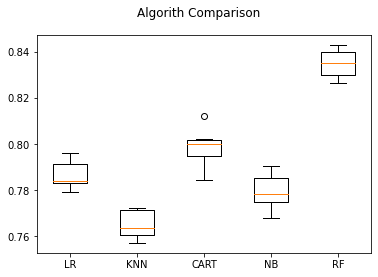

In [90]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### ***Algo Tuning***

1. best n_estimator = 250

2. best max_feature = 5

***Tune Random Forest***

3. n_estimators = np.array([50,100,150,200,250])

4. max_features = np.array([1,2,3,4,5])

5. param_grid = dict(n_estimators=n_estimators,max_features=max_features)

6. model = RandomForestClassifier()

7. kfold = KFold(n_splits=num_folds, random_state=seed)

8. grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, 
cv=kfold)

9. grid_result = grid.fit(X_train, Y_train)

10. print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

11. means = grid_result.cv_results_['mean_test_score']

12. stds = grid_result.cv_results_['std_test_score']

13. params = grid_result.cv_results_['params']

14. for mean, stdev, param in zip(means, stds, params):
     
     print("%f (%f) with: %r" % (mean, stdev, param))

## Finalize Model

In [91]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 83.9807493984187%
[[4057  389]
 [ 543  829]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4446
           1       0.68      0.60      0.64      1372

    accuracy                           0.84      5818
   macro avg       0.78      0.76      0.77      5818
weighted avg       0.83      0.84      0.84      5818

